<a href="https://colab.research.google.com/github/Preteka/Deep-Learning-Lab/blob/main/dl6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0617 - val_loss: 0.0042
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0015 - val_loss: 9.7148e-05
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0834e-04 - val_loss: 6.7934e-06
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.0450e-05 - val_loss: 4.4337e-06
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.0254e-06 - val_loss: 5.0871e-06
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.0573e-06 - val_loss: 1.8856e-06
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2178e-06 - val_loss: 3.1610e-06
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.0146e-06 - val_loss: 1.0110e-06
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0331e-06 - val_loss: 7.5627e-07
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.0946e-07 - val_loss: 1.2079e-06
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step

Sample Predictions:
True: -0.468, Predicted: -0.468


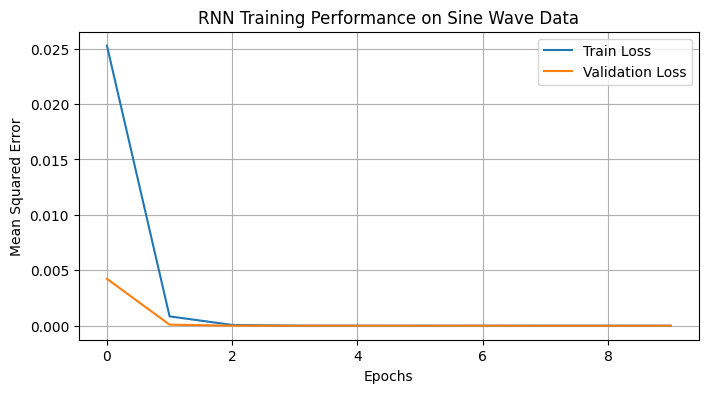

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# 1️⃣ Generate synthetic sine wave data
def generate_sine_wave(seq_length, num_samples):
    X, y = [], []
    for _ in range(num_samples):
        start = np.random.rand() * 2 * np.pi
        xs = np.linspace(start, start + 3 * np.pi, seq_length + 1)
        data = np.sin(xs)
        X.append(data[:-1])
        y.append(data[-1])
    return np.array(X), np.array(y)

seq_length = 50
num_samples = 1000
X, y = generate_sine_wave(seq_length, num_samples)

# Reshape for RNN: (samples, timesteps, features)
X = X.reshape((num_samples, seq_length, 1))

# 2️⃣ Build RNN model
model = Sequential([
    SimpleRNN(64, activation='tanh', input_shape=(seq_length, 1)),
    Dense(1)  # Predict next value in the sequence
])

# 3️⃣ Compile model
model.compile(optimizer='adam', loss='mse')

# 4️⃣ Train model
history = model.fit(
    X, y,
    epochs=10,           # slightly more epochs
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 5️⃣ Predict on first 10 samples
predictions = model.predict(X[:10])

print("\nSample Predictions:")
for i in range(5):
    print(f"True: {y[i]:.3f}, Predicted: {predictions[i][0]:.3f}")

# 6️⃣ Plot training & validation loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("RNN Training Performance on Sine Wave Data")
plt.grid(True)
plt.show()
